In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import plotly.express as px
import seaborn as sns

# Read the suicide rates data into a DataFrame
suicide_df = pd.DataFrame()
suicide_df = pd.read_csv('../data/suicide_rates.csv')

# Read the natural disasters data into a DataFrame
natural_disasters_df = pd.DataFrame()
natural_disasters_df = pd.read_csv('../data/natural_disasters.csv')

# Read the World Happiness Report 2021 data into a DataFrame
WHR2021_df = pd.DataFrame()
WHR2021_df = pd.read_csv('../data/WHR2021.csv')
WHR2021_df = WHR2021_df[['Country name', 'Ladder score']]
WHR2021_df.rename(columns={'Country name': 'Country or Area'}, inplace=True)
WHR2021_df.rename(columns={'Ladder Score': 'Value'}, inplace=True)

# Process the suicide rates data
for column in suicide_df.columns[1:]:
    # Extract point estimates from entries in the column
    suicide_df[column] = suicide_df[column].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x)

# Define a function to process CSV files in a given folder
def process_csv_files(folder_path):
    # Get list of all CSV files in the folder

    files_to_exclude = ['natural_disasters.csv', 'WHR2021.csv']


    file_paths = []
    for file in os.listdir(folder_path):
        if file.endswith('.csv') and file not in files_to_exclude:
            file_paths.append(os.path.join(folder_path, file))

    # List to store DataFrames
    dfs = []

    # Iterate through each CSV file
    for file_path in file_paths:
        df = pd.read_csv(file_path)

        # Rename columns
        df.rename(columns={'Year(s)': 'Year', 'Time Period': 'Year', 'Reference Area': 'Country or Area',
                           'Observation Value': 'Value', 'Country or territory of origin': 'Country or Area',
                           'Refugees*': 'Value', 'Countries, territories and areas': 'Country or Area'},
                  inplace=True)

        # Filter out rows with year 2101
        df = df[df['Year'] != 2101]

        # Filter rows where 'Sex' column is 'all genders'
        if 'Sex' in df.columns:
            df = df[df['Sex'] == 'All genders']

        # Filter columns
        df = df[['Country or Area', 'Year', 'Value']]

        # Convert data types
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric, coerce errors to NaN
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Convert to numeric, coerce errors to NaN

        # Extract the last part of the file path as the column suffix
        file_name = os.path.splitext(os.path.basename(file_path))[0]

        # Create custom column names
        custom_names = [f'{file_name}' if col == 'Value' else col for col in ['Country or Area', 'Year', 'Value']]

        # Rename columns
        df.columns = custom_names
        dfs.append(df)

    # Merge the DataFrames based on 'Country or Area' and 'Year'
    combined_df = dfs[0]
    for df in dfs[1:]:
        combined_df = pd.merge(combined_df, df, on=['Country or Area', 'Year'], how='outer')

    #Without regions to exclude
    print('Without regions to exclude :')
    num_rows, num_cols = combined_df.shape
    print("Number of rows:", "{:,.0f}".format(num_rows).replace(",", "."))
    print("Number of columns:", num_cols)

    # Regions to exclude
    regions_to_exclude = ['Africa', 'Asia', 'Australia/New Zealand', 'Australia/New Zealand', 'World', 'Eastern Africa',
                          'Eastern Africa', 'Eastern and South-Eastern Asia', 'Eastern Europe', 'High-income countries',
                          'Land-locked Developing Countries (LLDC)', 'Less developed regions, excluding China',
                          'Less developed regions',
                          'Less developed regions, excluding least developed countries',
                          'Small Island Developing States (SIDS)',
                          'No income group available', 'Northern Africa', 'Northern Africa and Western Asia',
                          'Northern America',
                          'Northern Europe', 'Low-income countries', 'Middle-income countries', 'More developed regions',
                          'Middle Africa',
                          'Eastern Asia', 'Soutern Asia', 'Western Europe', 'Upper-middle-income countries',
                          'Lower-middle-income countries',
                          'Europe', 'South-Eastern Asia', 'Southern Europe', 'Southern Asia', 'Southern Africa',
                          'Europe and Northern America',
                          'Central Asia', 'Central America', 'Central and Southern Asia', 'Sub-Saharan Africa',
                          'Least developed countries',
                          'Latin America and the Caribbean', 'Western Africa', 'South America', 'Western Asia']

    # Filter out regions
    filtered_combined_df = combined_df[~combined_df['Country or Area'].isin(regions_to_exclude)]

    # Multiply 'total_population' column by 1000
    filtered_combined_df.loc[:, "total_population"] *= 1000

    return filtered_combined_df

# Call the function with the folder path
folder_path = '../data'
result_df = process_csv_files(folder_path)



Without regions to exclude :
Number of rows: 139.231
Number of columns: 10


Hier ist eine Zusammenfassung aller Daten, wobei Regionen ausgeschlossen wurden:

Die analysierten Daten umfassen insgesamt 139.231 Zeilen und 10 Spalten. 

Durch die ausgeschlossenen Regionen werden 128.510 Zeilen und 10 Spalten analysiert. 

Die Heatmap zeigt die Verteilung der fehlenden Datenpunkte in dem Datensatz.

Die ausgeschlossenen Regionen umfassen:

- Afrika
- Asien
- Australien/Neuseeland
- Welt
- Ostafrika
- Osteuropa
- Hochentwickelte Länder
- Binnenentwicklungsgebiete (LLDC)
- Weniger entwickelte Regionen ohne China
- Weniger entwickelte Regionen
- Weniger entwickelte Regionen ohne die am wenigsten entwickelten Länder
- Kleine Inselentwicklungsstaaten (SIDS)
- Keine Einkommensgruppe verfügbar
- Nordafrika
- Nordafrika und Westasien
- Nordamerika
- Nordeuropa
- Niedrigeinkommensländer
- Mittlereinkommensländer
- Mehr entwickelte Regionen
- Mittelafrika
- Ostasien
- Südasien
- Westeuropa
- Obere mittlere Einkommensländer
- Untere mittlere Einkommensländer
- Europa
- Südostasien
- Südeuropa
- Südasien
- Südafrika
- Europa und Nordamerika
- Zentralasien
- Zentralamerika
- Zentral- und Südasien
- Subsahara-Afrika
- Am wenigsten entwickelte Länder
- Lateinamerika und die Karibik
- Westafrika
- Südamerika
- Westasien


Die ausgeschlossenen Regionen wurden aufgrund ihrer nichtspezifische Einheiten ausgewählt, die nicht auf einzelne Länder oder Gebiete verweisen. Diese Entscheidung basiert darauf, dass der Analysefokus auf einzelnen Ländern liegt, während Regionen, die mehrere Länder oder Gebiete umfassen, nicht relevant sind.

Durch die Ausschluss dieser Regionen wird sichergestellt, dass die Analyse auf den tatsächlichen Daten der einzelnen Länder basiert, wodurch die Genauigkeit und Relevanz der Ergebnisse verbessert wird. Dies ermöglicht eine präzisere Untersuchung der spezifischen Merkmale und Trends in Bezug auf einzelne Länder oder Gebiete, ohne von allgemeinen Daten beeinflusst zu werden.

Number of rows: 128.510
Number of columns: 10
Number of unique values: 1.285.100
Number of unique null values: 346.879
Number of null values per column: 109.741


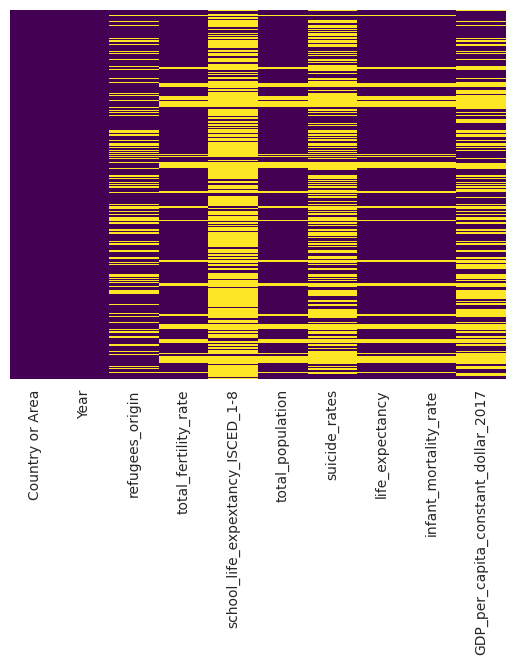

In [2]:

# Display the number of rows and columns in the DataFrame
num_rows, num_cols = result_df.shape

print("Number of rows:", "{:,.0f}".format(num_rows).replace(",", "."))
print("Number of columns:", num_cols)
print("Number of unique values:", "{:,.0f}".format(result_df.size).replace(",", "."))
print("Number of unique null values:", "{:,.0f}".format(result_df.isnull().sum().sum()).replace(",", "."))
print("Number of null values per column:","{:,.0f}".format(result_df.isnull().any(axis=1).sum()).replace(",", "."))
sns.heatmap(result_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Durch das Löschen aller Nullwerte erleiden wir einen enormen Datenverlust von 109.741 Zeilen und davon 1 097 410 unique values . Daher müssen wir alternative Strategien in Betracht ziehen, um diese Lücken zu füllen oder den Verlust zu minimieren. Es ist wichtig zu beachten, dass die Verwendung von Nullwerten die Gültigkeit der verwendeten Daten in keiner Weise beeinträchtigt.

Number of rows: 18.769
Number of columns: 10
Number of unique values: 187.690
Number of unique null values: 0
Number of null values per column: 0

Number of lost rows: 109.741
Number of unique lost values after dropping NaNs: 1.097.410


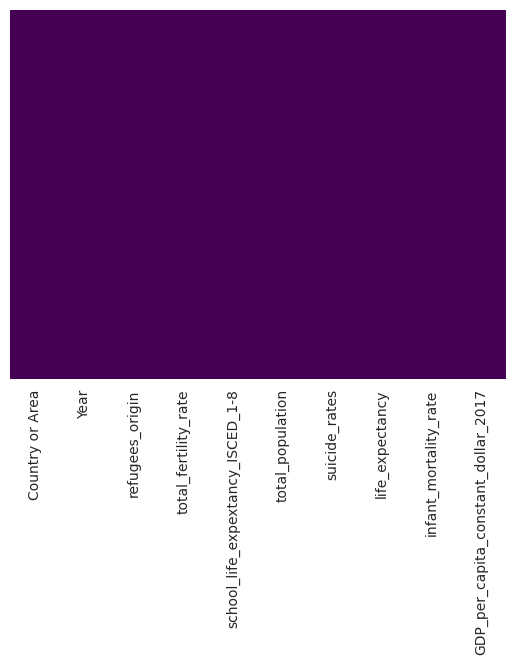

In [3]:
result_df_with_dropna = result_df.dropna()
# Display the number of rows and columns in the DataFrame
num_rows, num_cols = result_df_with_dropna.shape
print("Number of rows:", "{:,.0f}".format(num_rows).replace(",", "."))
print("Number of columns:", num_cols)
print("Number of unique values:", "{:,.0f}".format(result_df_with_dropna.size).replace(",", "."))
print("Number of unique null values:", "{:,.0f}".format(result_df_with_dropna.isnull().sum().sum()).replace(",", "."))
print("Number of null values per column:","{:,.0f}".format(result_df_with_dropna.isnull().any(axis=1).sum()).replace(",", "."))

# Calculate and display the number of lost rows and the number of unique values
num_lost_rows = result_df.shape[0] - num_rows
print("\nNumber of lost rows:", "{:,.0f}".format(num_lost_rows).replace(",", "."))
unique_values = result_df.size - result_df_with_dropna.size
print("Number of unique lost values after dropping NaNs:", "{:,.0f}".format(unique_values).replace(",", "."))

sns.heatmap(result_df_with_dropna.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()